# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendrás que recorrer las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imágenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. Con softmax como última capa

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


## 1. Cargar imágenes

In [ ]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (32,32)

In [3]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [3]:
ROOT_PATH = os.getcwd()

# TRAIN_PATH = os.getcwd() + "..\\Prof\\data\\seg_test"
# TEST_PATH = os.getcwd() + "\\2-Redes_Convolucionales\\Prof\\data\\seg_test"

TRAIN_PATH = r'C:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\Machine_Learning\5-Deep_Learning\2-Redes_Convolucionales\Prof\data\seg_train'
TEST_PATH = r'C:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\Machine_Learning\5-Deep_Learning\2-Redes_Convolucionales\Prof\data\seg_test'


1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).

In [ ]:
def read_data(path, im_size, class_names_label):
    X = []
    y = []
    
    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)
        
        # iterar sobre todo lo que hay en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
        
    return np.array(X), np.array(y)

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(14034, 32, 32, 3) (14034,)
(3000, 32, 32, 3) (3000,)


In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

sea


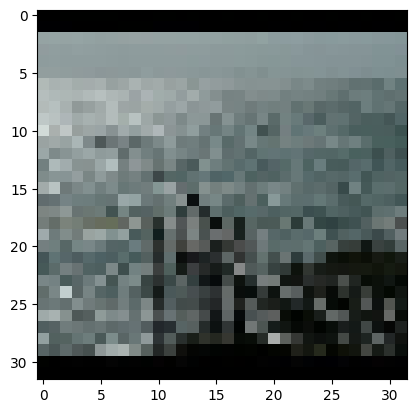

In [ ]:
# muestra una imagen random

index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [ ]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [ ]:
# normalizacion (Normalizar los datos hará que entrene mucho mejor la red, al estar todos los pixeles en la misma escala.)

X_train_sca = X_train/255
X_test_sca = X_test/255

3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [ ]:
np.savez(ROOT_PATH + '/data.npz',
        X_train = X_train_sca,
        y_train = y_train,
        X_test = X_test_sca,
        y_test = y_test)

In [4]:
data = np.load(ROOT_PATH + '/data.npz')
X_train_ = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

In [7]:
from tensorflow import keras

layers = [
    keras.layers.Conv2D(64, (4,4), activation='relu', input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (4,4), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
]

model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [9]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)

from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.h5")

In [11]:
history = model.fit(X_train_,
         y_train,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2,
         verbose=1)

Epoch 1/10


c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)




351/351 [==============================] - 10s 24ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696
Epoch 2/10
  3/351 [..............................] - ETA: 9s - loss: 0.0000e+00 - accuracy: 0.1771 

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


351/351 [==============================] - 8s 24ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696
Epoch 3/10
351/351 [==============================] - 8s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696
Epoch 4/10
351/351 [==============================] - 8s 22ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696
Epoch 5/10
351/351 [==============================] - 7s 21ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696
Epoch 6/10
351/351 [==============================] - 8s 21ms/step - loss: 0.0000e+00 - accuracy: 0.1698 - val_loss: 0.0000e+00 - val_accuracy: 0.1696


In [12]:
results = model.evaluate(X_test, y_test)
results

94/94 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.1670


[0.0, 0.16699999570846558]

In [13]:
model.predict(X_test).round(0)

94/94 [==============================] - 1s 7ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
np.argmax(model.predict(X_test).round(0), axis=1)

**Representar errores**

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, np.argmax(model.predict(X_test).round(0), axis=1))

94/94 [==============================] - 1s 7ms/step


array([[  0, 525,   0,   0,   0,   0],
       [  0, 501,   0,   0,   0,   0],
       [  0, 553,   0,   0,   0,   0],
       [  0, 437,   0,   0,   0,   0],
       [  0, 510,   0,   0,   0,   0],
       [  0, 474,   0,   0,   0,   0]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(model.predict(X_test).round(0), axis=1)), target_names=class_names))

94/94 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       525
           1       0.17      1.00      0.29       501
           2       0.00      0.00      0.00       553
           3       0.00      0.00      0.00       437
           4       0.00      0.00      0.00       510
           5       0.00      0.00      0.00       474

    accuracy                           0.17      3000
   macro avg       0.03      0.17      0.05      3000
weighted avg       0.03      0.17      0.05      3000



c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

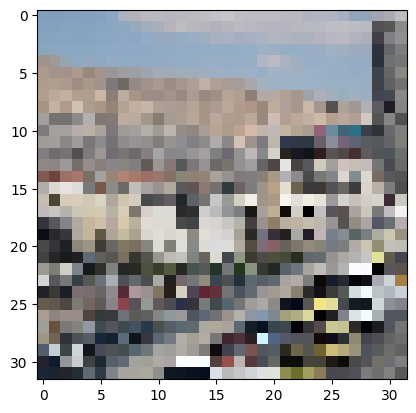

In [16]:
plt.imshow(X_test[-2]);
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
    
    
    return np.array(X), np.array(y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)

1/1 [==============================] - 0s 98ms/step


array([[1.],
       [1.]], dtype=float32)

In [18]:
predictions = model.predict(X_test[-2:]).round(0)
predictions
y_train

array([3, 1, 1, ..., 2, 3, 0])

## 2. Mostrar imágenes

forest


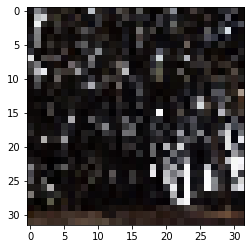

In [26]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

## 3. Normalización

In [27]:
X_train_scal = X_train/255.0
X_test_scal = X_test/255.0

## 4. Diseñar la RRNN